In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/joined.csv", delimiter=",").astype(np.float32)
eeg_data.shape

(12, 170752)

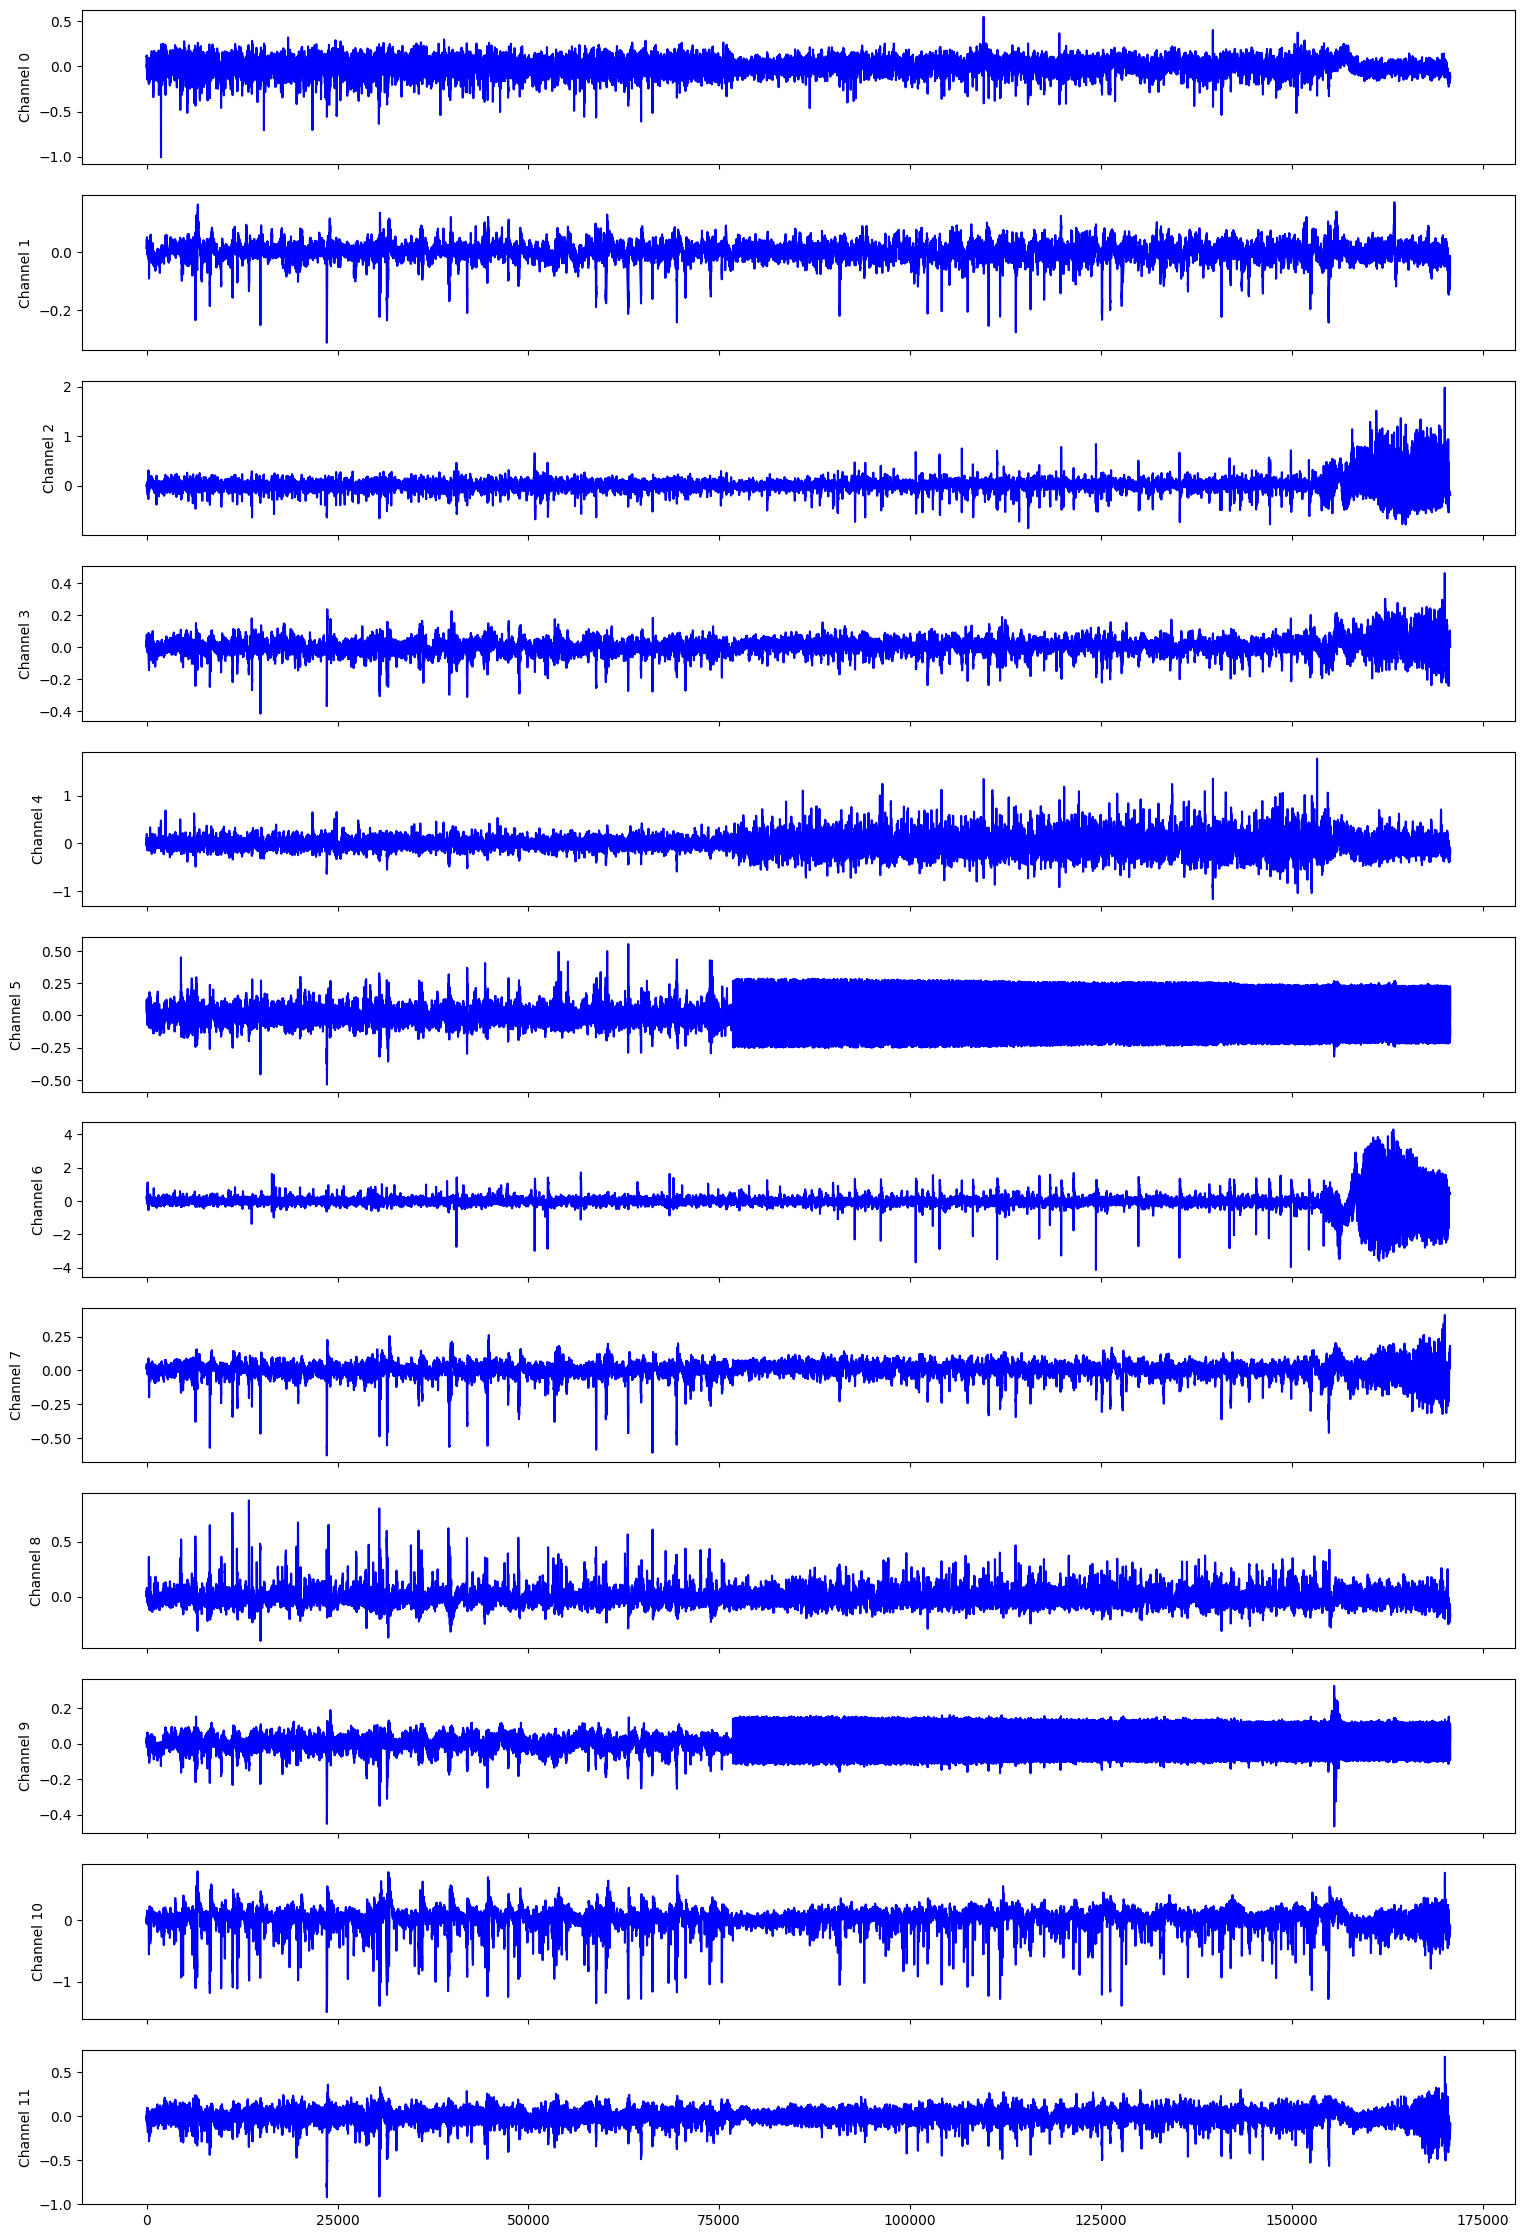

In [2]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 28.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [49]:
from importlib import reload
import CPD.benchwarm

reload(CPD.benchwarm)

<module 'CPD.benchwarm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchwarm.py'>

## Non-Seizure to Pre-Seizure

Detected change point at `t=82176`. 48.5 seconds past actual change-point (6176 ts).

In [4]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

In [87]:
# warm up for 15 seconds and determine best lags
# (warms up in ~7 mins)
arpwarm = CPD.benchwarm.ARPWarm(channels, n0=15, chunks=4)
arpwarm.warmup()

In [88]:
import CPD.benchmark
reload(CPD.benchmark)

<module 'CPD.benchmark' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchmark.py'>

In [93]:
cpd = CPD.benchmark.Online(arpwarm, k=2, M=11)

In [94]:
change_points, forecasts = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")
# AIMING FOR cp = 76800

STEP 15
channel_7 rejection incremented 1
channel_3 rejection incremented 1
channel_1 rejection incremented 1
STEP 16
channel_7 resetting rejection
channel_3 resetting rejection
channel_1 resetting rejection
STEP 17
channel_10 rejection incremented 1
channel_7 rejection incremented 1
STEP 18
channel_10 resetting rejection
channel_11 rejection incremented 1
channel_7 resetting rejection
channel_9 rejection incremented 1
channel_1 rejection incremented 1
STEP 19
channel_11 resetting rejection
channel_7 rejection incremented 1
channel_3 rejection incremented 1
channel_4 rejection incremented 1
channel_9 rejection incremented 2
channel_2 rejection incremented 1
channel_1 rejection incremented 2
STEP 20
channel_7 resetting rejection
channel_3 rejection incremented 2
channel_4 resetting rejection
channel_9 resetting rejection
channel_2 resetting rejection
channel_1 rejection incremented 3
STEP 21
channel_3 resetting rejection
channel_1 resetting rejection
STEP 22
channel_3 rejection incremen

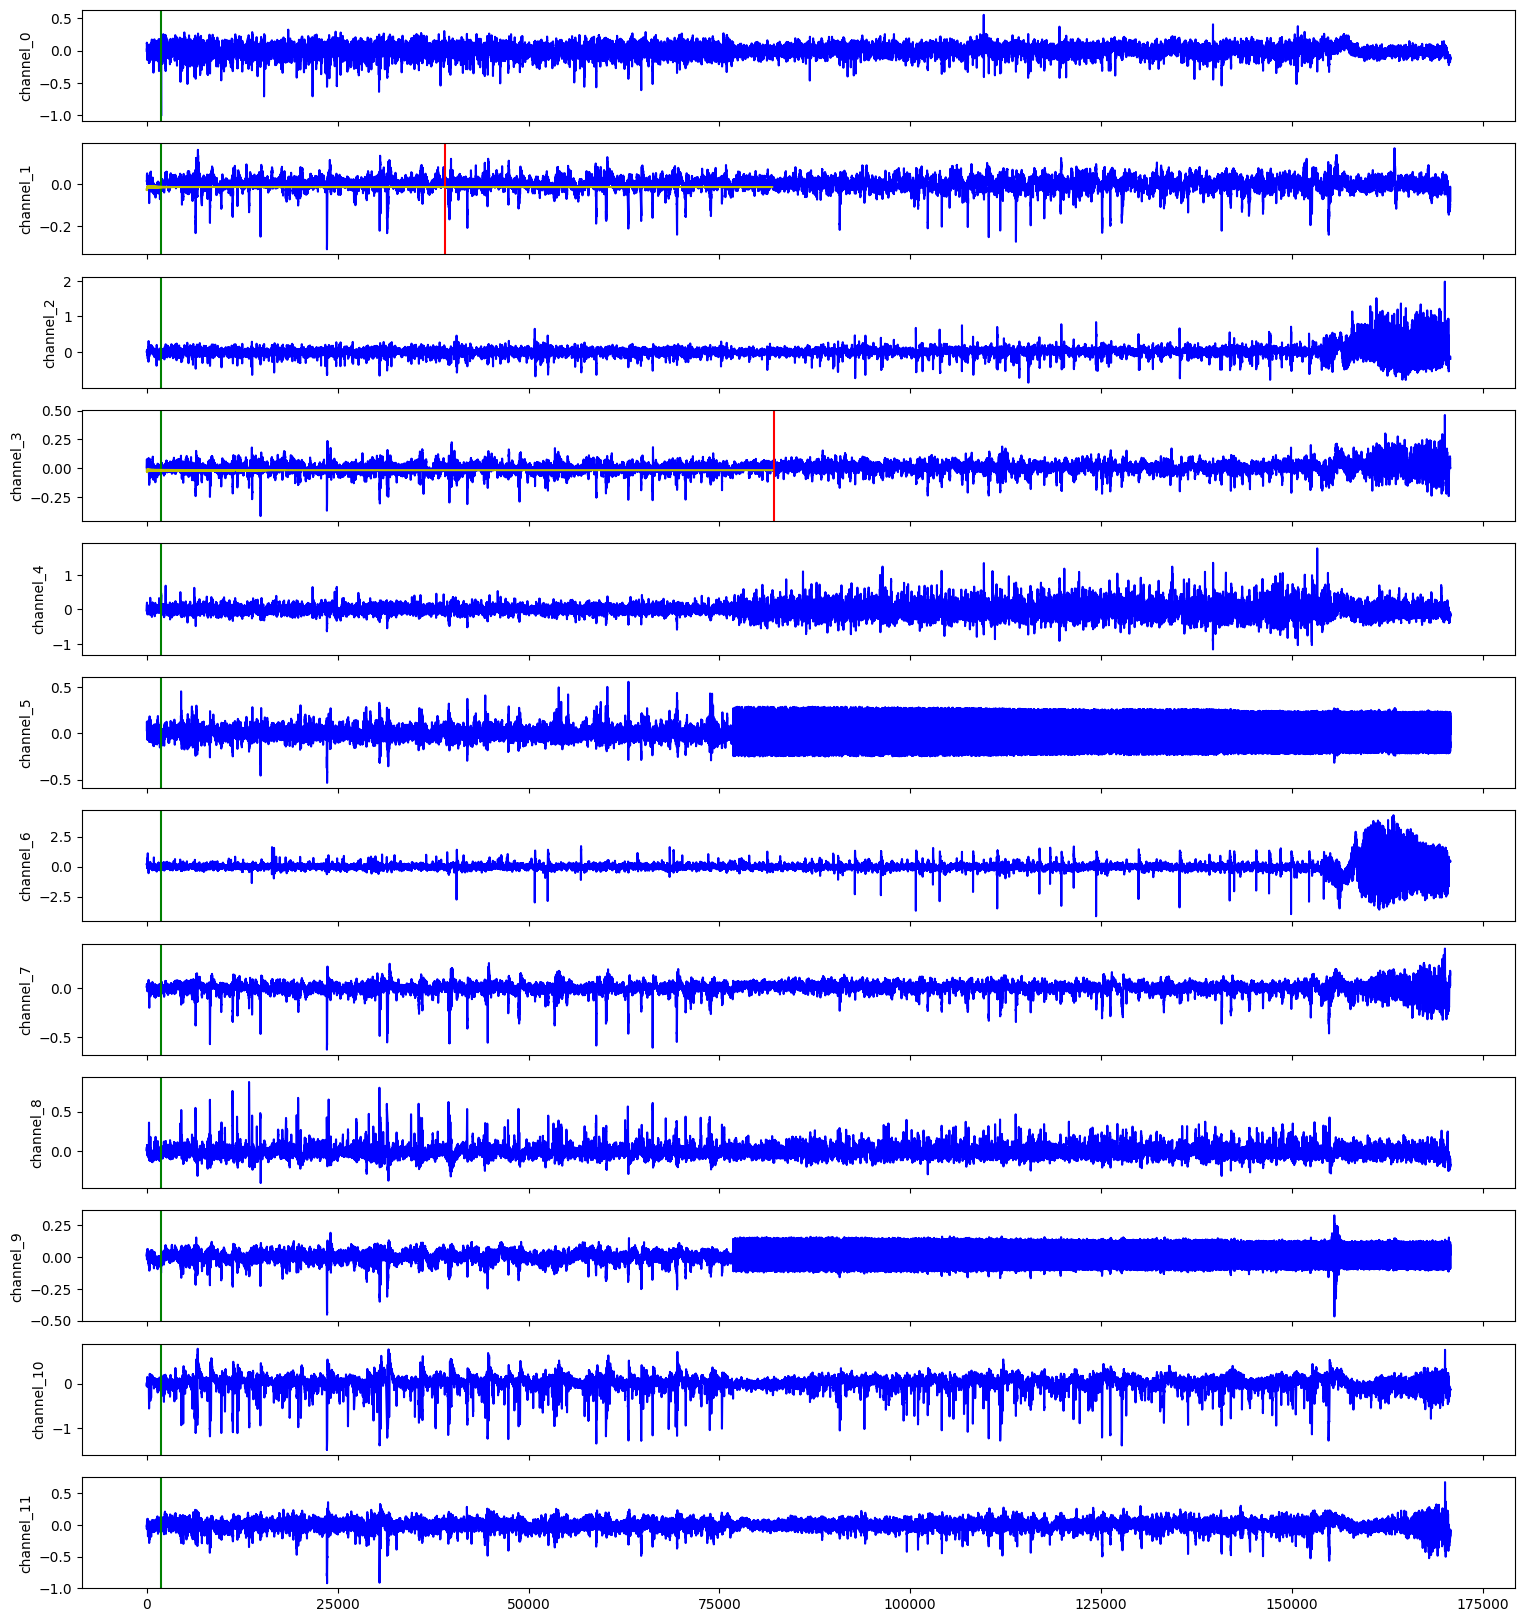

In [103]:
time = [i for i in range(eeg_data.shape[1])]
warmup = 15 * 128

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    axs[c].axvline(x=warmup, c='g')
    if chan in change_points:
        cpt = change_points[chan]
        axs[c].axvline(x=cpt, c='r')
        fore_time = [i for i in range(len(forecasts[chan]))]
        axs[c].plot(fore_time, forecasts[chan], 'y')
    axs[c].set_ylabel(chan)

## Pre-Seizure to Seizure

Detected change point at `t=73344`. 20.75 seconds past actual change-point (2656 ts).

In [105]:
# get data past detected change-point `t=82176`

post_channels = {}
for i in range(len(eeg_data)):
    post_channels[f"channel_{i}"] = eeg_data[i][82176:]

In [106]:
# warm up for 10 seconds and determine best lags
# (warms up in ~7 mins)

arpwarm = CPD.benchwarm.ARPWarm(post_channels, n0=10, chunks=4)
arpwarm.warmup()

In [108]:
cpd_seiz = CPD.benchmark.Online(arpwarm, k=2, M=11)

In [109]:
seiz_change_points, seiz_forecasts = cpd_seiz.run()

seiz_cpt = max(seiz_change_points.values())

print(f"change point detected at t={seiz_cpt}")
# AIMING FOR cp = 76800

STEP 10
STEP 11
channel_8 rejection incremented 1
channel_10 rejection incremented 1
channel_1 rejection incremented 1
STEP 12
channel_8 resetting rejection
channel_10 resetting rejection
channel_1 resetting rejection
STEP 13
STEP 14
channel_10 rejection incremented 1
channel_9 rejection incremented 1
STEP 15
channel_10 resetting rejection
channel_9 resetting rejection
channel_1 rejection incremented 1
STEP 16
channel_1 resetting rejection
STEP 17
channel_3 rejection incremented 1
STEP 18
channel_10 rejection incremented 1
channel_3 resetting rejection
STEP 19
channel_10 resetting rejection
STEP 20
STEP 21
channel_8 rejection incremented 1
channel_7 rejection incremented 1
channel_1 rejection incremented 1
STEP 22
channel_8 resetting rejection
channel_7 resetting rejection
channel_3 rejection incremented 1
channel_1 resetting rejection
STEP 23
channel_3 resetting rejection
STEP 24
STEP 25
channel_10 rejection incremented 1
channel_5 rejection incremented 1
STEP 26
channel_8 rejection i

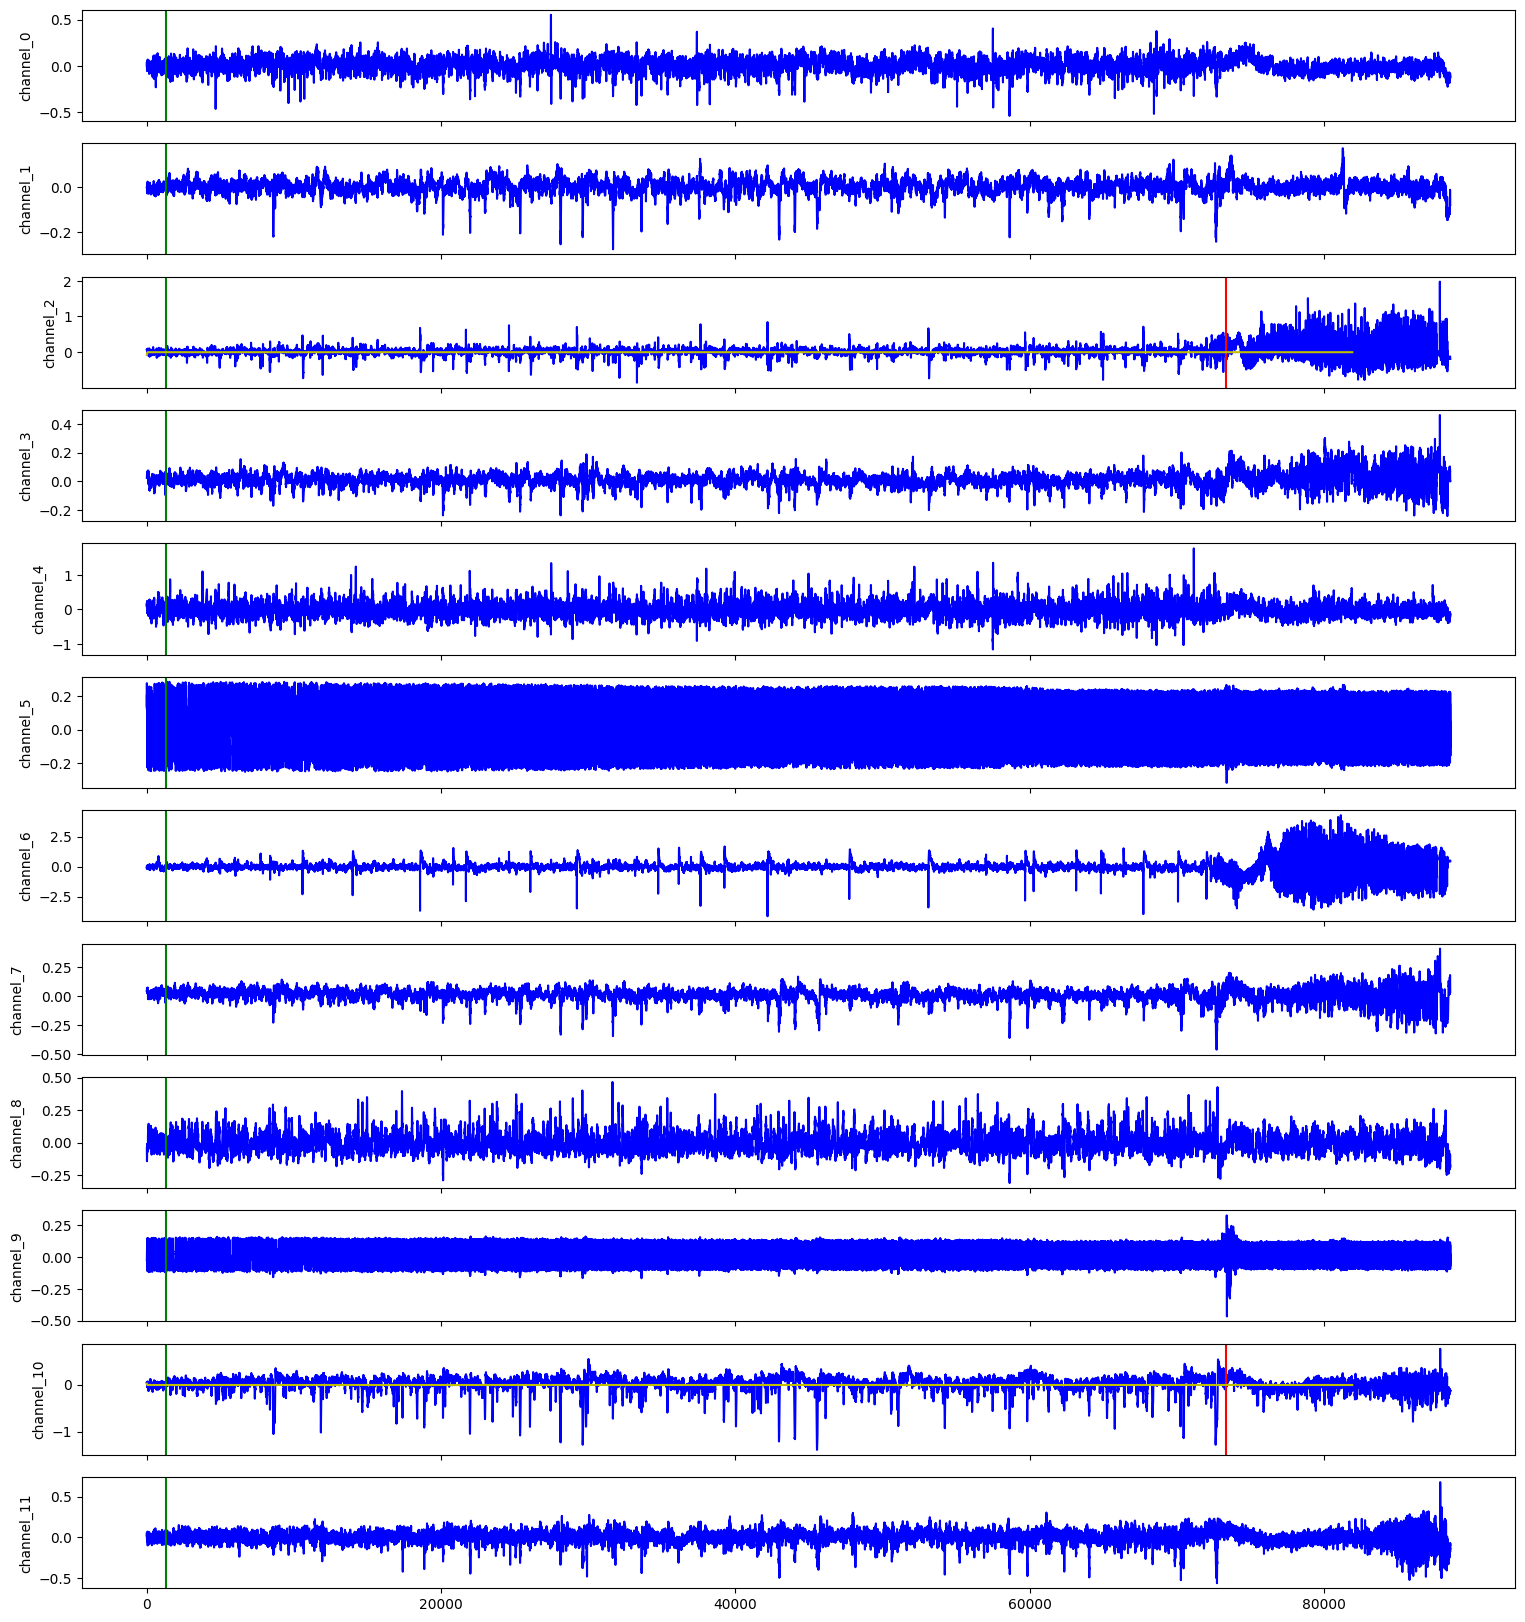

In [115]:
warmup = 10 * 128

time = [i for i in range(post_channels["channel_0"].shape[0])]

fig, axs = plt.subplots(len(post_channels), 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, post_channels[chan], 'b')
    
    axs[c].axvline(x=warmup, c='g')

    if chan in seiz_change_points:
        cpt = seiz_change_points[chan]
        axs[c].axvline(x=seiz_cpt, c='r')

        fore_time = [i for i in range(len(seiz_forecasts[chan]))]
        axs[c].plot(fore_time, seiz_forecasts[chan], 'y')

    axs[c].set_ylabel(chan)